# Voter Model (Dynamics on Networks)
### Nicolas Gort Freitas

In [230]:
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
import numpy as np
import networkx as nx
import seaborn as sns

class VoterModel:
    
    def __init__(self):
        self.counts = []
        self.timesteps = 0
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(g)
        
        for i in g.nodes:
            self.g.nodes[i]['state'] = 1 if np.random.random() < .5 else 0


            
    def observe(self):
        plt.cla()
        nx.draw(self.g, vmin = 0, vmax = 1,
            node_color = [self.g.nodes[i]['state'] for i in self.g.nodes],
            pos = self.g.pos)
        plt.show()
            
    def update(self):
        listener = np.random.choice(list(self.g.nodes))
        speaker = np.random.choice(list(self.g.neighbors(listener)))
        self.g.nodes[listener]['state'] = g.nodes[speaker]['state']

        self.timesteps+=1
        self.counts.append(np.sum([self.g.nodes[n]['state'] for n in self.g.nodes])/self.g.number_of_nodes())
        
    def update_rev(self):
        speaker = np.random.choice(list(self.g.nodes))
        listener = np.random.choice(list(self.g.neighbors(speaker)))

        self.g.nodes[listener]['state'] = g.nodes[speaker]['state']

        self.timesteps+=1
        self.counts.append(np.sum([self.g.nodes[n]['state'] for n in self.g.nodes])/self.g.number_of_nodes())
        
    def update_sym(self):
        sampled_edge = list(model.g.edges)[np.random.randint(0,len(list(model.g.edges)))]
        speaker, listener = np.random.choice(list(sampled_edge),2,replace=False)
        
        self.g.nodes[listener]['state'] = g.nodes[speaker]['state']

        self.timesteps+=1
        self.counts.append(np.sum([self.g.nodes[n]['state'] for n in self.g.nodes])/self.g.number_of_nodes())
        


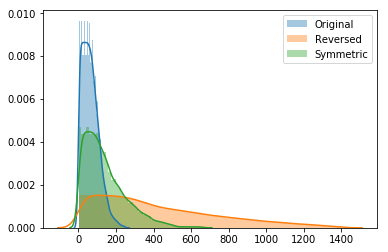

In [236]:
times_required = []
times_required_rev = []
times_required_sym = []

for _ in range(100):
    model = VoterModel()
    for __ in range(1400): 
        model.update()
        if model.counts[-1] in [0.0, 1.0]: break
        times_required.append(model.timesteps)

for _ in range(100):
    model = VoterModel()
    for __ in range(1400): 
        model.update_rev()
        if model.counts[-1] in [0.0, 1.0]: break
        times_required_rev.append(model.timesteps)

for _ in range(100):
    model = VoterModel()
    for __ in range(1400): 
        model.update_sym()
        if model.counts[-1] in [0.0, 1.0]: break
        times_required_sym.append(model.timesteps)

sns.distplot(times_required, label = 'Original')
sns.distplot(times_required_rev, label = 'Reversed')
sns.distplot(times_required_sym, label = 'Symmetric')
plt.legend()
#plt.title('Average: {}'.format(round(np.mean(times_required),2)))
plt.show()